In [74]:
import pandas as pd
import numpy as np
import json

In [75]:
#Otwieranie pliku
df = pd.read_json('dane_z_4_portali_poprawione.json', orient='index')
df.head(10)

,0,1,10,100,1000,10000,10001,10002,10003,10004,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
kuchnia,półotwarta,półotwarta,aneks,-1,-1,0,0,0,0,0,...,0,1,1,1,1,0,0,0,1,0
rynek,wtórny,wtórny,pierwotny,wtórny,wtórny,wtórny,wtórny,wtórny,wtórny,wtórny,...,wtórny,pierwotny,pierwotny,pierwotny,wtórny,pierwotny,wtórny,wtórny,wtórny,wtórny
balkon,nie,nie,-1,tak,tak,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
liczba_pieter_budynku,3,3,7,4,5,2,3,3,3,3,...,4,3,3,3,4,2,4,3,10,2
rok_budowy,2018,2018,2020,2018,2019,1916,1904,1998,2011,2010,...,1956,2019,2019,2019,1967,2019,1956,1900,1968,2011
powierzchnia-uzytkowa,46,47,41.59,57.96,63.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
miasto,gdańsk,gdańsk,gdańsk,gdańsk,gdańsk,Gdańsk,Gdańsk,Gdynia,Gdynia,Gdańsk,...,Gdynia,Gdańsk,Gdańsk,Gdańsk,Gdańsk,Gdynia,Gdańsk,Gdańsk,Sopot,Gdynia
liczba_pokoi,2,2,2,3,3,3,2,3,4,1,...,4,3,3,3,2,3,3,2,3,3
wykonczenie,-1,-1,do wykończenia,-1,-1,dozamieszkania,dozamieszkania,dozamieszkania,None,None,...,dozamieszkania,dowykończenia,dowykończenia,dowykończenia,dozamieszkania,dowykończenia,dozamieszkania,doremontu,dozamieszkania,dozamieszkania
ulica,piastowska,piastowska,-1,gen. józefa hallera,opacka,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [76]:
df=df.T

In [77]:
df.columns

Index(['kuchnia', 'rynek', 'balkon', 'liczba_pieter_budynku', 'rok_budowy',
       'powierzchnia-uzytkowa', 'miasto', 'liczba_pokoi', 'wykonczenie',
       'ulica', 'pietro', 'rodzaj_zabudowy', 'powierzchnia', 'dzielnica',
       'forma-wlasnosci', 'cena', 'adres', 'serwis', 'material_budynku',
       'cena_za_metr', 'oferta', 'ogrzewanie', 'winda', 'czynsz', 'url',
       'tytul', 'tresc', 'nr_licencji_posrednika', 'typ_nieruchomosci',
       'nr_oferty', 'typ_ogrzewania', 'id_ogloszenia', 'data_wyroznienia',
       'data', 'data_aktualizacji', 'wyswietlenia', 'wyswietlen_na_liscie',
       'dodatkowe_informacje', 'zdjecie', 'data_dostepne',
       'powierzchnia_dzialki', 'ulica_i_nr'],
      dtype='object')

### CECHY DO ANALIZY:

'kuchnia', 
'rynek', 
'balkon',
'liczba_pieter_budynku',
'rok_budowy',
'powierzchnia-uzytkowa', 
'miasto', 
'liczba_pokoi', 
'wykonczenie',
'ulica',

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27813 entries, 0 to 9999
Data columns (total 42 columns):
kuchnia                   11668 non-null object
rynek                     10347 non-null object
balkon                    5356 non-null object
liczba_pieter_budynku     27740 non-null object
rok_budowy                26604 non-null object
powierzchnia-uzytkowa     5356 non-null object
miasto                    14750 non-null object
liczba_pokoi              27803 non-null object
wykonczenie               9570 non-null object
ulica                     5356 non-null object
pietro                    27621 non-null object
rodzaj_zabudowy           13004 non-null object
powierzchnia              27807 non-null object
dzielnica                 9335 non-null object
forma-wlasnosci           5356 non-null object
cena                      27813 non-null object
adres                     27813 non-null object
serwis                    27813 non-null object
material_budynku          7432 non

In [79]:
df.dtypes

kuchnia                   object
rynek                     object
balkon                    object
liczba_pieter_budynku     object
rok_budowy                object
powierzchnia-uzytkowa     object
miasto                    object
liczba_pokoi              object
wykonczenie               object
ulica                     object
pietro                    object
rodzaj_zabudowy           object
powierzchnia              object
dzielnica                 object
forma-wlasnosci           object
cena                      object
adres                     object
serwis                    object
material_budynku          object
cena_za_metr              object
oferta                    object
ogrzewanie                object
winda                     object
czynsz                    object
url                       object
tytul                     object
tresc                     object
nr_licencji_posrednika    object
typ_nieruchomosci         object
nr_oferty                 object
typ_ogrzew

In [80]:
df.describe()

,kuchnia,rynek,balkon,liczba_pieter_budynku,rok_budowy,powierzchnia-uzytkowa,miasto,liczba_pokoi,wykonczenie,ulica,...,data_wyroznienia,data,data_aktualizacji,wyswietlenia,wyswietlen_na_liscie,dodatkowe_informacje,zdjecie,data_dostepne,powierzchnia_dzialki,ulica_i_nr
count,11668,10347,5356,27740,26604.0,5356.0,14750,27803,9570,5356,...,4997,13487,12969,13487,13487,10949,13487,2448,94,982
unique,17,4,3,56,143.0,1837.0,9,27,41,1066,...,295,648,155,1977,9345,973,2,339,43,103
top,0,wtórny,tak,4,2019.0,38.0,Gdańsk,3,-1,-1,...,30 kwietnia 2020,8 maja 2020,10 maja 2020,144,6 689,Piwnica,True,Od zaraz,100,Rzeczypospolitej 8/205
freq,4309,4147,2669,6495,2195.0,60.0,6011,9170,3629,659,...,302,326,1881,49,8,483,13276,495,6,194


### Kuchnia - 58% NAN, a nawet więcej ok. 23 tyś. - USUWAMY

In [81]:
df['kuchnia'].unique()

array(['półotwarta ', 'aneks', '-1', 0, 'brak ', 1, 'z oknem',
       'oddzielna', 'otwarta ', None, 'w aneksie', 'okno na pokój ',
       'bez okna ', 'zamknięta ', 'kuchnia otwarta bez okna ',
       'kuchnia z jadalnią ', 'otwarta na pokój ', 'wnęka '], dtype=object)

In [82]:
df['kuchnia'].value_counts()

0                            4309
-1                           3202
oddzielna                    1151
w aneksie                     839
1                             682
aneks                         590
półotwarta                    318
z oknem                       218
brak                          180
otwarta                       157
bez okna                        6
zamknięta                       4
wnęka                           4
kuchnia otwarta bez okna        3
kuchnia z jadalnią              3
otwarta na pokój                1
okno na pokój                   1
Name: kuchnia, dtype: int64

In [83]:
nan=df['kuchnia'].isna().sum()
nan

16145

In [84]:
(nan/df.shape[0])*100

58.04839463560205

### Rynek - 58% NAN, NAN można uzupełnić rokiem budowy 

In [85]:
df['rynek'].unique()

array(['wtórny ', 'pierwotny ', 'wtórny', 'pierwotny', None], dtype=object)

In [86]:
df['rynek'].value_counts()

wtórny        4147
wtórny        3553
pierwotny     1438
pierwotny     1209
Name: rynek, dtype: int64

In [87]:
nan=df['kuchnia'].isna().sum()
nan

16145

In [88]:
(nan/df.shape[0])*100

58.04839463560205

### Balkon - 80% NAN - USUWAMY

In [89]:
df['balkon'].unique()

array(['nie ', '-1', 'tak ', None], dtype=object)

In [90]:
df['balkon'].value_counts()

tak     2669
-1      2296
nie      391
Name: balkon, dtype: int64

In [91]:
nan=df['balkon'].isna().sum()
nan

22457

In [92]:
(nan/df.shape[0])*100

80.74281810664078

### Liczba pięter budynku - ZOSTAWIAMY

In [93]:
df['liczba_pieter_budynku'].unique()

array([3, 7, 4, 5, 2, 8, 6, 10, 12, 17, 9, 1, 11, 18, -1, 16, '3', '2',
       '4', '1', '10', '9', '11', None, '5', '6', '8', '12', 'powyżej 30',
       '7', '24', '28', '23', '13', '25', '15', '21', '17', '18', '16',
       '19', '14', 13, 0, 24, 28, 32, 15, 23, 29, 14, 19, 38, 33, 100, 20,
       25], dtype=object)

In [94]:
df['liczba_pieter_budynku'].value_counts()

4             6495
3             6194
2             2749
10            1828
5             1534
4             1010
3              987
6              899
1              639
17             525
2              483
7              474
-1             468
0              464
8              436
5              339
11             294
12             271
10             261
9              208
17             202
6              129
16             128
1              126
8               96
18              81
7               66
12              55
11              50
9               41
13              34
38              24
16              23
15              21
28              17
18              14
32              11
24               9
19               8
20               6
14               5
15               5
powyżej 30       4
13               4
25               3
29               3
24               3
28               3
23               2
33               2
100              2
23               1
25          

In [95]:
nan=df['liczba_pieter_budynku'].isna().sum()
nan

73

In [96]:
(nan/df.shape[0])*100

0.26246719160104987

In [97]:
df['liczba_pieter_budynku']=df['liczba_pieter_budynku'].fillna(-1)

In [98]:
nan=df['liczba_pieter_budynku'].isna().sum()
nan

0

In [99]:
df['liczba_pieter_budynku'].value_counts()

4             6495
3             6194
2             2749
10            1828
5             1534
4             1010
3              987
6              899
1              639
-1             541
17             525
2              483
7              474
0              464
8              436
5              339
11             294
12             271
10             261
9              208
17             202
6              129
16             128
1              126
8               96
18              81
7               66
12              55
11              50
9               41
13              34
38              24
16              23
15              21
28              17
18              14
32              11
24               9
19               8
20               6
14               5
15               5
powyżej 30       4
13               4
25               3
29               3
24               3
28               3
23               2
33               2
100              2
23               1
25          

### Rok budowy - ZOSTAWIAMY

In [100]:
df['rok_budowy'].unique()

array([2018.0, 2020.0, 2019.0, 1916.0, 1904.0, 1998.0, 2011.0, 2010.0,
       2006.0, 2017.0, 1920.0, 1970.0, 2021.0, 2000.0, 2013.0, 1900.0,
       1950.0, 2009.0, 2012.0, 1930.0, 1980.0, 2014.0, 2003.0, 1960.0,
       1978.0, 1987.0, 1986.0, 1910.0, 2016.0, 2007.0, 1975.0, 2022.0,
       2008.0, 1902.0, 1991.0, 1979.0, 2015.0, 1932.0, 1953.0, 1952.0,
       1936.0, 1957.0, 1905.0, 1999.0, 1983.0, 1958.0, 1955.0, 1954.0,
       1937.0, 1967.0, 1956.0, -1.0, 1992.0, 1994.0, 1971.0, 1990.0,
       2005.0, 1941.0, 1985.0, 1995.0, 1893.0, 2001.0, 1963.0, 1993.0,
       1965.0, 1929.0, 2004.0, 1982.0, 1906.0, 1996.0, 1901.0, 1966.0,
       nan, 1912.0, 1977.0, 1997.0, 1903.0, 1974.0, 1928.0, 1935.0,
       1926.0, 1924.0, 1907.0, 1915.0, 1984.0, 1968.0, 1969.0, 1976.0,
       1940.0, 1911.0, 1897.0, 1896.0, 2002.0, 1908.0, 1914.0, 1981.0,
       1895.0, 1913.0, 1898.0, 1890.0, 1939.0, 1973.0, 1972.0, 1909.0,
       1964.0, 1989.0, 1934.0, 1938.0, 1962.0, 1988.0, 1951.0, 1931.0,
       1945

In [101]:
df['rok_budowy'].value_counts()

 2019.0    2195
 2020.0    2185
 0.0       2007
 1980.0    1126
 1970.0     955
 2021.0     889
 2018.0     871
 2012.0     725
-1.0        690
 2017.0     684
 2013.0     586
 2011.0     550
 2009.0     518
 2016.0     517
 1960.0     509
 2015.0     461
 1950.0     438
 2000.0     408
 1975.0     405
 2010.0     405
 2008.0     379
 1978.0     352
 1930.0     342
 2007.0     335
 2014.0     332
 2006.0     310
 1920.0     308
 1976.0     290
 2005.0     267
 2003.0     253
           ... 
 1927.0      10
 1949.0       9
 1931.0       8
 1942.0       7
 1924.0       7
 1941.0       7
 1.0          6
 1914.0       6
 1498.0       6
 1893.0       5
 1933.0       5
 1909.0       4
 2029.0       4
 1888.0       3
 1875.0       3
 1809.0       3
 1899.0       2
 191.0        2
 10.0         2
 19.0         2
 90.0         2
 190.0        2
 1919.0       2
 200.0        2
 1922.0       2
 1891.0       2
 1943.0       2
 1947.0       2
 150.0        1
 1892.0       1
Name: rok_budowy, Length

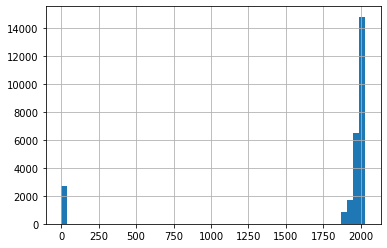

In [102]:
%matplotlib inline
df['rok_budowy'].hist(bins=50)

In [103]:
df[df['rok_budowy']<1000]

,kuchnia,rynek,balkon,liczba_pieter_budynku,rok_budowy,powierzchnia-uzytkowa,miasto,liczba_pokoi,wykonczenie,ulica,...,data_wyroznienia,data,data_aktualizacji,wyswietlenia,wyswietlen_na_liscie,dodatkowe_informacje,zdjecie,data_dostepne,powierzchnia_dzialki,ulica_i_nr
1017,otwarta,wtórny,-1,10,-1,31,gdańsk,1,wysoki standard,jagiellońska,...,None,None,None,None,None,None,None,None,None,None
1024,-1,wtórny,-1,2,-1,57.32,gdańsk,4,deweloperski,stężycka,...,None,None,None,None,None,None,None,None,None,None
1025,-1,wtórny,tak,2,-1,65,gdańsk,4,deweloperski,stężycka,...,None,None,None,None,None,None,None,None,None,None
1028,-1,wtórny,tak,4,-1,67.78,gdańsk,2,deweloperski,stężycka,...,None,None,None,None,None,None,None,None,None,None
1033,oddzielna,wtórny,-1,4,-1,54,gdańsk,3,-1,dąbrowszczaków,...,None,None,None,None,None,None,None,None,None,None
1038,-1,wtórny,tak,4,-1,77.1,gdańsk,4,deweloperski,stężycka,...,None,None,None,None,None,None,None,None,None,None
1040,oddzielna,wtórny,tak,10,-1,66,gdańsk,3,-1,wincentego witosa,...,None,None,None,None,None,None,None,None,None,None
1055,aneks,wtórny,-1,17,-1,64,gdańsk,3,idealny,"przymorze wielkie,",...,None,None,None,None,None,None,None,None,None,None
1070,-1,wtórny,-1,4,-1,57.92,gdańsk,3,deweloperski,hokejowa,...,None,None,None,None,None,None,None,None,None,None
1108,-1,wtórny,tak,3,-1,53,gdańsk,-1,do wprowadzenia,"chełm,",...,None,None,None,None,None,None,None,None,None,None


In [104]:
df[df['rok_budowy']>2030]

,kuchnia,rynek,balkon,liczba_pieter_budynku,rok_budowy,powierzchnia-uzytkowa,miasto,liczba_pokoi,wykonczenie,ulica,...,data_wyroznienia,data,data_aktualizacji,wyswietlenia,wyswietlen_na_liscie,dodatkowe_informacje,zdjecie,data_dostepne,powierzchnia_dzialki,ulica_i_nr


In [105]:
df=df[df['rok_budowy']>1000] # TUTAJ TRACIMY 4 TYŚ OBSERWACJI!!

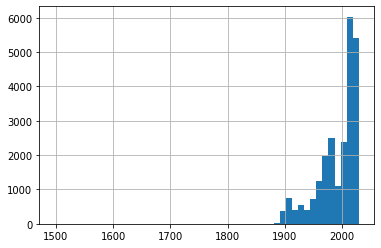

In [106]:
%matplotlib inline
df['rok_budowy'].hist(bins=50)

In [107]:
nan=df['rok_budowy'].isna().sum()
nan

0

In [108]:
(nan/df.shape[0])*100

0.0

In [109]:
df.shape

(23888, 42)

### Powierzchnia użytkowa - 80% NAN - USUWAMY

In [110]:
df['powierzchnia-uzytkowa'].unique()

array([46.0, 47.0, 41.59, ..., 78.7, 77.5, 62.18], dtype=object)

In [111]:
df['powierzchnia-uzytkowa'].value_counts()

38.00     48
53.00     47
45.00     44
63.00     41
54.00     40
60.00     40
65.00     39
70.00     37
50.00     36
46.00     35
67.00     34
49.00     34
55.00     33
0.00      33
47.00     32
58.00     32
43.00     32
48.00     30
40.00     29
44.00     29
30.00     26
64.00     25
56.00     25
42.00     24
37.00     24
48.20     23
72.00     22
28.00     21
33.00     21
61.00     21
          ..
35.29      1
126.07     1
66.02      1
129.20     1
58.96      1
43.60      1
69.34      1
70.83      1
51.72      1
57.60      1
87.05      1
122.63     1
84.89      1
26.74      1
39.02      1
40.81      1
70.71      1
38.10      1
125.40     1
65.69      1
124.20     1
68.88      1
84.55      1
84.72      1
237.00     1
76.70      1
108.20     1
95.79      1
127.30     1
107.06     1
Name: powierzchnia-uzytkowa, Length: 1715, dtype: int64

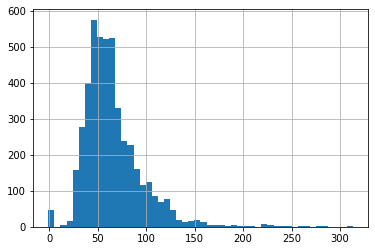

In [112]:
%matplotlib inline
df['powierzchnia-uzytkowa'].hist(bins=50)

In [113]:
nan=df['powierzchnia-uzytkowa'].isna().sum()
nan

19222

In [114]:
(nan/df.shape[0])*100

80.46718017414601

### Miasto - ZOSTAWIAMY - 46% NAN - jak uzupełnić braki w danych?

In [115]:
df['miasto'].unique()

array(['gdańsk', 'Gdańsk', 'Gdynia', 'Sopot', None, 'Chwaszczyno',
       'Rumia', 'gdynia', 'Żukowo', 'sopot'], dtype=object)

In [116]:
df['miasto'].value_counts()

Gdańsk         5020
gdańsk         2970
Gdynia         2379
gdynia         1280
Sopot           593
sopot           416
Rumia             5
Chwaszczyno       4
Żukowo            1
Name: miasto, dtype: int64

In [117]:
nan=df['miasto'].isna().sum()
nan

11220

In [118]:
(nan/df.shape[0])*100

46.96918955123912

### Liczba pokoi - ZOSTAWIAMY

In [119]:
df['liczba_pokoi'].unique()

array([2, 3, 4, 1, 5, 6, '3', '4', '2', '5', '1', '7', '6',
       'więcej niż 8', None, -1, 0, 20, 9, 8, 7, 16, 10, 36, 15, 18],
      dtype=object)

In [120]:
df['liczba_pokoi'].value_counts()

3               8226
2               7491
4               3136
1               1222
3               1046
2                972
5                712
4                465
6                182
1                136
5                 97
0                 39
7                 35
6                 30
9                 24
10                16
-1                13
7                 12
8                  9
więcej niż 8       6
15                 4
20                 3
18                 2
36                 2
16                 2
Name: liczba_pokoi, dtype: int64

In [121]:
nan=df['liczba_pokoi'].isna().sum()
nan

6

In [122]:
(nan/df.shape[0])*100

0.02511721366376423

In [131]:
df['liczba_pokoi']=df['liczba_pokoi'].fillna(-1)

In [132]:
nan=df['liczba_pokoi'].isna().sum()
nan

0

### Wykończenie - 65% NAN ok. 21 tyś. NAN - USUWAMY

In [123]:
df['wykonczenie'].unique()

array(['-1', 'do wykończenia ', 'dozamieszkania', None, 'doremontu',
       'dowykończenia', 'wysoki standard ', 'bardzo wysoki standard ',
       'dobry ', 'do remontu ', 'do odświeżenia ', 'do odświeżenia',
       'do remontu', 'bardzo dobry ', 'dobry', 'świeżo po remoncie',
       'wysoki standard', 'stan deweloperski', 'do adaptacji ',
       'deweloperski ', 'wykończony ', 'do remontu kapit. ',
       'do wprowadzenia ', 'normalny ', 'do odnowienia ', 'podwyższony ',
       'idealny ', 'do odświeżenia,do drobnego remontu ', 'komfort ',
       'nowy ', 'po remoncie ', 'po generalnym remoncie ',
       'dobry poziom ', 'wymaga remontu kapitalnego ', 'luksusowy ',
       'po odświeżeniu ', 'do drobnego remontu,do odświeżenia '],
      dtype=object)

In [124]:
df['wykonczenie'].value_counts()

-1                                     3150
dozamieszkania                         2322
dowykończenia                          1133
wysoki standard                         412
doremontu                               308
do wykończenia                          193
bardzo wysoki standard                  182
dobry                                   169
deweloperski                            167
bardzo dobry                            118
do remontu                              112
do remontu                              104
stan deweloperski                        67
dobry                                    62
wysoki standard                          62
do odświeżenia                           49
do odświeżenia                           48
do adaptacji                             22
świeżo po remoncie                       18
idealny                                  15
normalny                                 15
do remontu kapit.                        15
nowy                            

In [125]:
nan=df['wykonczenie'].isna().sum()
nan

15097

In [126]:
(nan/df.shape[0])*100

63.1990957803081

### Ulica - 80% NAN - USUWAMY

In [127]:
df['ulica'].unique()

array(['piastowska', '-1', 'gen. józefa hallera', 'opacka', None,
       'prezydenta lecha kaczyńskiego', 'łąkowa', 'czarny dwór',
       'botanica, ', 'powstania listopadowego', 'myśliwska',
       'al. grunwaldzka', 'pszenna', 'zeusa', 'joachima lelewela',
       'pastelowa', 'granitowa', 'międzygwiezdna', 'głęboka',
       'obrońców wybrzeża', 'mikołaja reja', 'niepołomicka', 'wawelska',
       'morenowe wzgórze', 'mostek', 'niccola paganiniego', 'piecewska',
       'zawodzie', 'jerzego świrskiego', 'rajska', 'oliwa ', 'toruńska',
       'lęborska', 'śląska', 'jaglana', 'ogarna', 'partyzantów',
       'sympatyczna', 'dolne migowo', 'wołkowyska',
       'al. gen. józefa hallera', 'potęgowska', 'trzy lipy', 'stężycka',
       'góralska', 'ignacego paderewskiego', 'przymorze ', 'sienna',
       'sandomierska', 'krzysztofa kamila baczyńskiego',
       'eugeniusza węgrzyna', 'kazimierza leskiego', 'morena, ',
       'kiełpinek, ', 'stefanii sempołowskiej', 'jabłoniowa',
       'ujeścisko

In [128]:
df['ulica'].value_counts()

-1                                 505
morena,                             96
myśliwska                           59
nasypowa                            46
grudziądzka                         45
wałowa                              42
toruńska                            40
obrońców wybrzeża                   38
św. barbary                         38
śródmieście                         38
gen. józefa hallera                 37
ul. kartuska                        32
władysława łokietka                 27
chmielna                            26
stężycka                            25
bolesława chrobrego                 24
potęgowska                          24
nadmorski dwór                      23
botanica,                           23
szafarnia                           23
dąbrowszczaków                      23
jacka malczewskiego                 22
ogarna                              21
al. grunwaldzka                     21
adama mickiewicza                   20
rdestowa                 

In [129]:
nan=df['ulica'].isna().sum()
nan

19222

In [130]:
(nan/df.shape[0])*100

80.46718017414601